In [77]:
import sys
!{sys.executable} -m pip install opencv-python
!{sys.executable} -m pip install torch torchvision
!{sys.executable} -m pip install pillow
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install openai==0.28
!{sys.executable} -m pip install googletrans==4.0.0-rc1
!{sys.executable} -m pip install opencv-python-headless
!{sys.executable} -m pip install git+https://github.com/facebookresearch/segment-anything.git
!{sys.executable} -m pip install opencv-python pycocotools matplotlib onnxruntime onnx
!{sys.executable} -m pip install python-dotenv
!{sys.executable} -m pip install git+https://github.com/JiahuiYu/neuralgym


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Cloning https://github.com/facebookresearch/segment-anything.git to c:\users\user\appdata\local\temp\pip-req-build-2wlt6r5y
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git 'C:\Users\USER\AppData\Local\Temp\pip-req-build-2wlt6r5y'

[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Cloning https://github.com/JiahuiYu/neuralgym to c:\users\user\appdata\local\temp\pip-req-build-2e67tkch
  Resolved https://github.com/JiahuiYu/neuralgym to commit 88292adb524186693a32404c0cfdc790426ea441
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for neuralgym: filename=neuralgym-0.0.1-py3-none-any.whl size=40775 sha256=cdcc57658bfd0675733af9304a8f226b3a4b827ed8d6df98e7fc2590778d092f
  Stored in directory: C:\Users\USER\AppData\Local\Temp\pip-ephem-wheel-cache-63xuvelr\wheels\0e\7d\62\0c6ef513087996dd7140b84065ec01029a85538234d455103a
Successfully built neuralgym


  Running command git clone --filter=blob:none --quiet https://github.com/JiahuiYu/neuralgym 'C:\Users\USER\AppData\Local\Temp\pip-req-build-2e67tkch'

[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


利用 openai 對中文翻譯後生廣告圖

In [65]:
import openai
import requests
from PIL import Image
from io import BytesIO
from dotenv import load_dotenv
import os

load_dotenv(r"C:\Users\USER\Desktop\Develop\product-image-generator-backend\.env")
openai.api_key = "sk-proj-tcq4oqtah1nMeAZmxYxWT3BlbkFJtCx2hq0J1ZSPRT0YcOWs"

def translate_text_gpt(text, model="gpt-3.5-turbo"):
    response = openai.ChatCompletion.create(
        model=model,
        messages=[
            {"role": "system", "content": "You are a helpful assistant that translates Chinese to English."},
            {"role": "user", "content": f"Translate the following Chinese text to English accurately and completely:\n\n{text}"}
        ],
        max_tokens=200,
        n=1,
        temperature=0.5,
    )
    translation = response['choices'][0]['message']['content'].strip()
    return translation

def generate_image(prompt, size, output_file):
    response = openai.Image.create(
        prompt=prompt,
        n=1,
        size=size
    )
    image_url = response['data'][0]['url']

    # 下載圖片並保存
    image_response = requests.get(image_url)
    img = Image.open(BytesIO(image_response.content))
    img.save(output_file)
    print(f"圖片已保存為 {output_file}")

def main():
    product_name = "水壺"
    product_feature = "方便攜帶"
    gender = "男"
    age = "25~34"
    job = "軟體工程師"
    interest = "運動、健身及休閒娛樂指導員"

    # 建立中文提示
    # chinese_prompt = (
    #     f"產生一張對於{age}歲的{gender}的產品廣告背景圖。"
    #     f"請專注於{interest}的地點，背景必須具有代表性，例如對於喜歡{interest}的人，他們會在該場景進行{interest}。"
    #     f"圖片中不能包含{product_name}。"
    #     f"此廣告需營造{product_feature}的感覺，帶入真實感。"
    #     f"影像風格要求明確，以突顯{interest}的使用場景。"
    # )

    chinese_prompt = (
        f"產生一張廣告背景圖，針對{age}歲的{gender}性進行銷售。"
        f"專注於產生{interest}的地點，背景必須具有代表性，例如對於喜歡{interest}的人，他們會在該場景進行{interest}。"
        f"圖片中不能包含{product_name}。"
        f"此廣告需營造{product_feature}。"
        f"影像風格要求明確，以突顯{interest}的場景。"
    )

    # 翻譯成英文
    english_prompt = translate_text_gpt(chinese_prompt)
    print(f"英文提示: {english_prompt}")

    # 生成圖片
    from datetime import datetime
    now = datetime.now().strftime("%Y%m%d_%H%M%S")
    generate_image(english_prompt, size="512x512", output_file=f"background_{now}.png")

main()

英文提示: Create an advertising background image targeting men aged 25-34 for sales. Focus on locations where sports, fitness, and leisure instructors are present. The background must be representative, for example, for people who enjoy sports, fitness, and leisure instruction, they will be engaging in sports, fitness, and leisure activities in that scene. The image should not include a water bottle. This advertisement should convey portability. The visual style needs to be clear to highlight scenes of sports, fitness, and leisure instruction.
圖片已保存為 background_20240704_021258.png


### 進行視覺工程 V1 (針對生成不包含水壺的圖片)


In [69]:
import cv2
import numpy as np
from PIL import Image
from segment_anything import sam_model_registry, SamPredictor
import torch

from PIL import Image, ImageEnhance, ImageFilter, ImageDraw, ImageChops
import random

In [72]:
class ProductImageProcessor:
    def __init__(self, model_type="vit_h", checkpoint_path="sam_vit_h_4b8939.pth"):
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        self.model = sam_model_registry[model_type](checkpoint=checkpoint_path)
        self.predictor = SamPredictor(self.model)

    def segment_product(self, image_path):
        # 读取图像
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # 自动选择非白色区域点
        points, labels = self.auto_select_points(image_rgb)

        # 设置图像并预测遮罩
        self.predictor.set_image(image_rgb)
        masks, scores, _ = self.predictor.predict(
            point_coords=points,
            point_labels=labels,
            multimask_output=True
        )

        # 根据分数选择最佳遮罩
        best_mask_index = np.argmax(scores)
        mask = masks[best_mask_index].astype(np.uint8)

        return mask, image_rgb

    def auto_select_points(self, image):
        # 找到所有非白色像素点
        non_white = np.all(image < [245, 245, 245], axis=2)
        y_coords, x_coords = np.where(non_white)

        # 选择一些代表性点（例如：四分位点）
        sample_indices = np.linspace(0, len(x_coords) - 1, num=5, dtype=int)
        points = np.column_stack((x_coords[sample_indices], y_coords[sample_indices]))
        labels = np.ones(len(points), dtype=int)  # 所有选择点都视为前景点

        return points, labels

    def apply_mask(self, image, mask):
        # 应用遮罩到图像
        bgra_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGRA)
        bgra_image[:, :, 3] = mask * 255  # 转换遮罩为透明度通道
        return Image.fromarray(bgra_image)

    def save_image(self, image, path):
        image.save(path)


In [75]:

class ImageProcessor:
    def __init__(self, foreground_path, background_path):
        self.foreground = Image.open(foreground_path).convert("RGBA")
        self.background = Image.open(background_path).convert("RGBA")

    def detect_container_areas(self, bg_image, fg_image):
        # 舉例: 分辨是否為容器
        gray = cv2.cvtColor(bg_image, cv2.COLOR_BGR2GRAY)
        _, thresholded = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

        # 使用形態學來操作清理圖像
        kernel = np.ones((5,5), np.uint8)
        cleaned = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel)

        # 可以使用標籤或連通組件來找到獨立的容器區域
        num_labels, labels_im = cv2.connectedComponents(cleaned)

        return labels_im

    def _find_best_position(self, fg, bg):
        fg_w, fg_h = fg.size
        bg_w, bg_h = bg.size
        bg_gray = bg.convert("L")
        bg_gray_np = np.array(bg_gray)
        
        # 獲得容器區
        container_areas = self.detect_container_areas(np.array(bg), np.array(fg))

        local_std = cv2.blur(np.square(bg_gray_np), (fg_w, fg_h))
        local_mean = cv2.blur(bg_gray_np, (fg_w, fg_h))
        mean_sq = np.square(local_mean)
        local_std = np.sqrt(local_std - mean_sq)

        # 評估每個區域標準差集容器可能性
        best_score = float('inf')
        best_position = (0, 0)
        for y in range(bg_h - fg_h + 1):
            for x in range(bg_w - fg_w + 1):
                # 定義分數：標準差低且在容器區域內得分高
                std_score = local_std[y:y+fg_h, x:x+fg_w].mean()
                container_score = container_areas[y:y+fg_h, x:x+fg_w].mean()  # 假設容器區域在 labels_im 中標記較高
                score = std_score - container_score  # 標準差低，容器得分高為佳

                if score < best_score:
                    best_score = score
                    best_position = (x, y)

        return best_position
    
    def _create_mask(self, fg):
        return fg.split()[3]
    
    def _blend_edges(self, image, mask):
        mask_resized = mask.resize(image.size, Image.Resampling.LANCZOS)
        blurred_mask = mask_resized.filter(ImageFilter.GaussianBlur(radius=5))
        composite_image = Image.composite(image, Image.new("RGBA", image.size), blurred_mask)
        return composite_image

    # 基本陰影
    def add_basic_shadow(self):
        shadow = Image.new("RGBA", self.background.size, (0, 0, 0, 0))
        draw = ImageDraw.Draw(shadow)
        position = self._find_best_position(self.foreground, self.background)
        fg_w, fg_h = self.foreground.size
        offset = 5  # 陰影偏移量
        shadow_box = [position[0] + offset, position[1] + fg_h - 10, position[0] + fg_w + offset, position[1] + fg_h]
        draw.ellipse(shadow_box, fill=(0, 0, 0, 128))  # 半透明黑色陰影
        self.background = Image.alpha_composite(self.background, shadow)

    # 柔化邊緣陰影
    def add_soft_shadow(self):
        shadow = Image.new("RGBA", self.background.size, (0, 0, 0, 0))
        draw = ImageDraw.Draw(shadow)
        position = self._find_best_position(self.foreground, self.background)
        fg_w, fg_h = self.foreground.size
        offset = 5
        shadow_box = [position[0] + offset, position[1] + fg_h - 5, position[0] + fg_w + offset, position[1] + fg_h]
        draw.ellipse(shadow_box, fill=(0, 0, 0, 128))
        blurred_shadow = shadow.filter(ImageFilter.GaussianBlur(10))
        self.background = Image.alpha_composite(self.background, blurred_shadow)

    # 光暈效果
    def add_glow_effect(self):
        glow = Image.new("RGBA", self.background.size, (0, 0, 0, 0))
        draw = ImageDraw.Draw(glow)
        position = self._find_best_position(self.foreground, self.background)
        fg_w, fg_h = self.foreground.size
        glow_box = [position[0] - 10, position[1] - 10, position[0] + fg_w + 10, position[1] + fg_h + 10]
        draw.ellipse(glow_box, fill=(255, 255, 255, 30))
        blurred_glow = glow.filter(ImageFilter.GaussianBlur(15))
        self.background = Image.alpha_composite(self.background, blurred_glow)

    def composite_images(self, scale=1.0):
        # 動態調整產品圖片大小
        original_size = self.foreground.size
        new_size = (int(original_size[0] * scale), int(original_size[1] * scale))
        resized_foreground = self.foreground.resize(new_size, Image.Resampling.LANCZOS)

        # 最佳位置
        position = self._find_best_position(resized_foreground, self.background)
        
        # 提取產品圖 Alpha 通道作為遮罩
        mask = resized_foreground.split()[3]

        # 基於產品圖調整遮罩大小
        mask_resized = mask.resize(new_size, Image.Resampling.LANCZOS)

        # 判斷產品置入位置是否在底部
        if position[1] > self.background.height - self.background.height * 0.1:
            # 若在底部，不增加效果
            print("Position is at the bottom, no effects will be added.")
        else:
            # 不在底部，隨機選擇一個效果
            effects = [self.add_basic_shadow, self.add_soft_shadow, self.add_glow_effect]
            chosen_effect = random.choice(effects)
            chosen_effect()  # 應用選擇的效果
            print(f"Applied effect: {chosen_effect.__name__}")

        # 黏貼產品圖至背景圖，使用調整的遮罩，確保產品圖在所有效果頂部
        self.background.paste(resized_foreground, position, mask_resized)

    def enhance_foreground_saturation(self):
        enhancer = ImageEnhance.Color(self.foreground)
        self.foreground = enhancer.enhance(2)

    def save_image(self, path):
        self.background.save(path)


In [76]:
print("擷取產品圖")
processor = ProductImageProcessor()
mask, image_rgb = processor.segment_product('product.png')
result_image = processor.apply_mask(image_rgb, mask)
result_image.save('product_transparent.png')

directory = r"C:\Users\USER\Desktop\Develop\product-image-generator-backend\openai_model"

for filename in os.listdir(directory):
    if filename.startswith("background") and filename.endswith(".png"):
        back_path = os.path.join(directory, filename)
        print(f"處理圖片: {back_path}")
        processor = ImageProcessor("product_transparent.png", back_path)
        processor.composite_images(scale=1.2)  # 縮放產品圖並合成
        processor.enhance_foreground_saturation()
        result_path = os.path.join(directory, f"result_{filename}")
        processor.save_image(result_path)
        print(f"圖片保存為: {result_path}")


擷取產品圖
處理圖片: C:\Users\USER\Desktop\Develop\product-image-generator-backend\openai_model\background_20240704_000723.png
Applied effect: add_glow_effect
圖片保存為: C:\Users\USER\Desktop\Develop\product-image-generator-backend\openai_model\result_background_20240704_000723.png
處理圖片: C:\Users\USER\Desktop\Develop\product-image-generator-backend\openai_model\background_20240704_001453.png
Applied effect: add_glow_effect
圖片保存為: C:\Users\USER\Desktop\Develop\product-image-generator-backend\openai_model\result_background_20240704_001453.png
處理圖片: C:\Users\USER\Desktop\Develop\product-image-generator-backend\openai_model\background_20240704_011413.png
Applied effect: add_glow_effect
圖片保存為: C:\Users\USER\Desktop\Develop\product-image-generator-backend\openai_model\result_background_20240704_011413.png
處理圖片: C:\Users\USER\Desktop\Develop\product-image-generator-backend\openai_model\background_20240704_011549.png
Applied effect: add_soft_shadow
圖片保存為: C:\Users\USER\Desktop\Develop\product-image-generat

設計不同尺寸

In [78]:
import cv2
import numpy as np

def resize_image_with_background(image_path, width, height, save_path, interpolation=cv2.INTER_LINEAR, background_color=(255, 255, 255)):
    # 讀取原圖像
    image = cv2.imread(image_path)
    original_height, original_width = image.shape[:2]
    
    # 計算比例
    scale = min(width / original_width, height / original_height)
    new_width = int(original_width * scale)
    new_height = int(original_height * scale)
    
    # 調整圖像大小
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=interpolation)
    
    # 創建帶有顏色背景的新圖像
    new_image = np.full((height, width, 3), background_color, dtype=np.uint8)
    
    # 计算放置图像的起始点
    start_x = (width - new_width) // 2
    start_y = (height - new_height) // 2
    
    # 將調整大小的圖像放在新的背景中心
    new_image[start_y:start_y + new_height, start_x:start_x + new_width] = resized_image

    # 創建掩碼，標記需要修補的區域
    mask = np.zeros((height, width), dtype=np.uint8)
    mask[:start_y, :] = 255
    mask[start_y + new_height:, :] = 255
    mask[:, :start_x] = 255
    mask[:, start_x + new_width:] = 255

    # 使用inpaint進行修補
    inpainted_image = cv2.inpaint(new_image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

    # 保存新圖像
    cv2.imwrite(save_path, inpainted_image)

# 調整圖片大小並修補
final_img = "result_background_20240704_021258.png"

# 第一個尺寸
width1, height1 = 300, 250
save_path1 = f'input_image_{width1}_{height1}.png'
resize_image_with_background(final_img, width1, height1, save_path1, interpolation=cv2.INTER_CUBIC)

# 第二個尺寸
width2, height2 = 320, 480 
save_path2 = f'input_image_{width2}_{height2}.png'
resize_image_with_background(final_img, width2, height2, save_path2, interpolation=cv2.INTER_CUBIC)

### 進行視覺工程 V1 (針對生成包含水壺的圖片)

1. 利用 Mask-CNN 對生成出的廣告圖進行 去除產品 及 修復
2. 將產品圖取出，使用 GrabCut 算法
3. 將取出的產品圖完美覆蓋 mask 位置

步驟1: 獲取遮罩並分割
步驟2: 利用遮罩覆蓋背景圖並修復


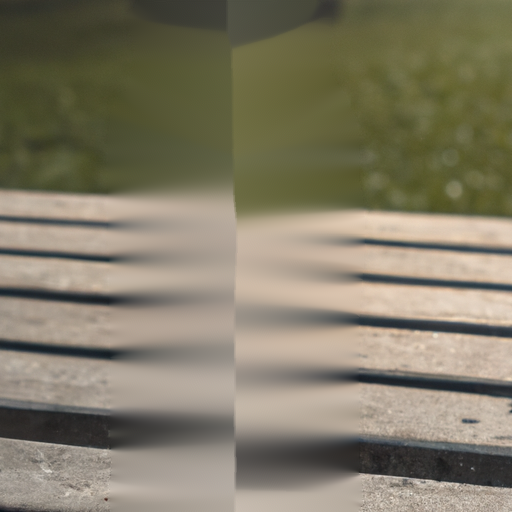

步驟3: 創建產品透明去背圖


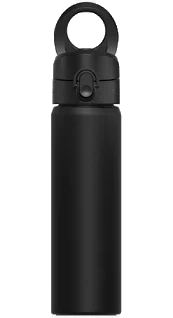

步驟4: 調整並顯示產品圖
最佳角度: 0


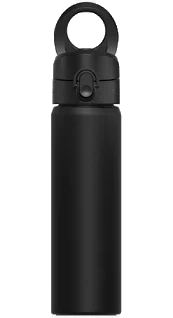

步驟5: 將產品圖放入修復後的背景圖中


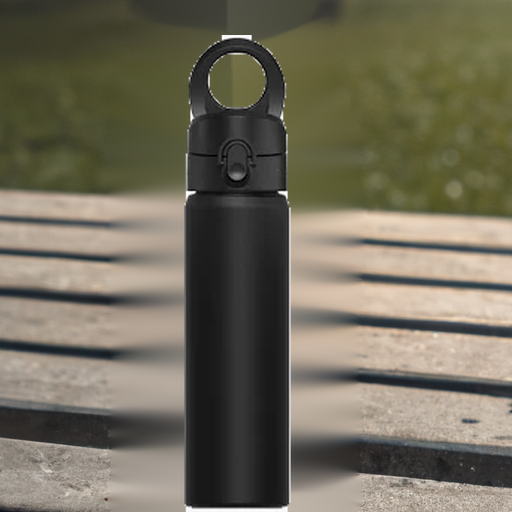

步驟6: 最後平滑與視覺平衡


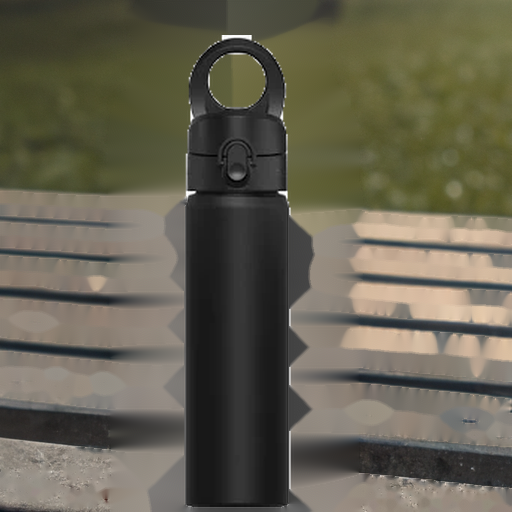

In [112]:
import torch
from torchvision.models.detection import maskrcnn_resnet50_fpn
import torchvision.transforms as T
import cv2
import numpy as np
from PIL import Image
from IPython.display import display

# 初始化 Mask-CNN
def get_model():
    model = maskrcnn_resnet50_fpn(pretrained=True)
    model.eval()
    return model

# 圖像預處理
def prepare_image(img_path):
    image = Image.open(img_path).convert("RGB")
    transform = T.Compose([T.ToTensor()])
    image = transform(image)
    return image

# 預測遮罩
def predict_mask(model, image):
    with torch.no_grad():
        prediction = model([image])
    return prediction

# 保存圖像
def save_image(image, file_path):
    image.save(file_path)

# 修復圖像並返回修復後的圖像和調整後的遮罩
def repair_image(original_img, mask):
    original_img = np.array(original_img)
    mask = mask.squeeze().detach().cpu().numpy()
    mask = (mask * 255).astype(np.uint8)
    mask_resized = cv2.resize(mask, (original_img.shape[1], original_img.shape[0]), interpolation=cv2.INTER_NEAREST)
    repaired_img = cv2.inpaint(original_img, mask_resized, inpaintRadius=3, flags=cv2.INPAINT_TELEA)
    return Image.fromarray(repaired_img), mask_resized

# 調整產品貼合遮罩
def adjust_and_rotate_product(product_image, mask):

    x, y, w, h = cv2.boundingRect(mask)
    
    min_diff = float('inf')
    best_angle = 0
    best_product = product_image

    for angle in range(0, 360):
        rotated_product = product_image.rotate(angle, expand=True)
        rotated_array = np.array(rotated_product)

        if rotated_array.shape[0] < mask.shape[0] or rotated_array.shape[1] < mask.shape[1]:
            continue

        cropped_product = rotated_array[y:y+h, x:x+w]

        mask_alpha = mask / 255.0
        product_alpha = cropped_product[:, :, 3] / 255.0

        if mask_alpha.shape != product_alpha.shape:
            continue
        
        diff = np.sum((product_alpha - mask_alpha) ** 2)
        
        if diff < min_diff:
            min_diff = diff
            best_angle = angle
            best_product = rotated_product

    print(f"最佳角度: {best_angle}")
    return best_product, (x, y, w, h)

# 將產品圖放入修復後背景中
def place_product_in_image(repaired_image, product_image, position, scale_factor=1.0):
    x, y, w, h = position

    # 调整产品图像大小并保持比例
    product_image = product_image.resize(
        (int(product_image.width * scale_factor), int(product_image.height * scale_factor)),
        Image.LANCZOS
    )
    
    # 获取修复图像和产品图像的数组
    repaired_array = np.array(repaired_image.convert("RGBA"))
    product_array = np.array(product_image)

    # 创建遮罩控制透明度
    product_alpha = product_array[:, :, 3] / 255.0

    # 计算放置产品图像的区域的实际大小
    pw, ph = product_array.shape[1], product_array.shape[0]
    y_start = max(0, y + h - ph)
    x_end = min(repaired_array.shape[1], x + pw)
    y_end = min(repaired_array.shape[0], y_start + ph)

    # 将产品图像融合到修复图像中
    for c in range(0, 3):
        repaired_array[y_start:y_end, x:x_end, c] = product_alpha[:y_end-y_start, :x_end-x] * product_array[:y_end-y_start, :x_end-x, c] + \
                                                     (1 - product_alpha[:y_end-y_start, :x_end-x]) * repaired_array[y_start:y_end, x:x_end, c]

    return Image.fromarray(repaired_array)

def remove_stains(image):
    # 将 PIL 图像转换为 NumPy 数组以使用 OpenCV 函数
    image_np = np.array(image.convert('RGB'))

    # 转换到 HSV 色彩空间
    hsv_image = cv2.cvtColor(image_np, cv2.COLOR_RGB2HSV)

    # 设置用于识别浅色污渍的阈值，这里假设污渍是较亮的颜色
    # 需要根据实际情况调整阈值
    lower_bound = np.array([0, 0, 150])  # 较低的色彩和饱和度，较高的亮度
    upper_bound = np.array([180, 60, 255])  # HSV中，H的范围通常是0-180

    # 创建掩码
    mask = cv2.inRange(hsv_image, lower_bound, upper_bound)

    # 形态学操作：使用开运算去除小的噪点
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    # 修复图像：对掩码区域应用 inpaint
    inpainted_image = cv2.inpaint(image_np, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

    # 将处理后的图像转回 PIL 格式
    final_pil_image = Image.fromarray(inpainted_image)
    return final_pil_image

def main():
    
    transparent_product_loc = "transparent_product.png"
    
    print("步驟1: 獲取遮罩並分割")
    model = get_model()
    image_tensor = prepare_image("background.png")
    prediction = predict_mask(model, image_tensor)

    mask_np = (prediction[0]['masks'][0].squeeze().detach().cpu().numpy() * 255).astype(np.uint8)
    original_image = Image.open("background.png").convert("RGB")
    mask_sized = cv2.resize(mask_np, (original_image.width, original_image.height), interpolation=cv2.INTER_LINEAR)
    save_image(Image.fromarray(mask_sized), "saved_mask.png")  # 保存遮罩

    print("步驟2: 利用遮罩覆蓋背景圖並修復")
    repaired_image, mask_sized = repair_image(original_image, prediction[0]['masks'][0])
    # save_image(repaired_image, "repaired_image.png")
    display(repaired_image)

    print("步驟3: 創建產品透明去背圖")
    transparent_product = extract_and_make_transparent("product.png", transparent_product_loc)
    display(transparent_product)

    print("步驟4: 調整並顯示產品圖")
    best_product, position = adjust_and_rotate_product(transparent_product, mask_sized)
    # save_image(best_product, "adjusted_product.png")
    display(best_product)

    print("步驟5: 將產品圖放入修復後的背景圖中")
    final_image = place_product_in_image(repaired_image, best_product, position, scale_factor=1.5)
    save_image(final_image, "final_image.png")
    display(final_image)
    
    print("步驟6: 最後平滑與視覺平衡")
    final_pil_image = remove_stains(final_image)
    save_image(final_pil_image, "final_image.png")
    display(final_pil_image)

    
def extract_and_make_transparent(image_path, save_path):
    # 載入圖像
    image = cv2.imread(image_path)
    mask = np.zeros(image.shape[:2], np.uint8)

    # 初始化 GrabCut 臨時 array
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)

    # 定義一個包含前景的矩形（格式是 (x,y,w,h)）
    rect = (1, 1, image.shape[1] - 2, image.shape[0] - 2)  # 調整矩形以包含前景

    # 執行 GrabCut
    cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 10, cv2.GC_INIT_WITH_RECT)

    # 將可能的和確定的前景設為1，其他為0
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    
    # 通過腐蝕和膨脹調整遮罩，以確保邊緣更精確
    kernel = np.ones((3, 3), np.uint8)
    mask2 = cv2.dilate(mask2, kernel, iterations=3)
    mask2 = cv2.erode(mask2, kernel, iterations=3)

    # 將遮罩應用到原始圖像，提取前景
    image_fg = image * mask2[:, :, np.newaxis]

    # 將背景設置為透明
    image_fg = cv2.cvtColor(image_fg, cv2.COLOR_BGR2BGRA)
    image_fg[:, :, 3] = mask2 * 255

    # 轉換圖像為RGBA格式
    result_image = Image.fromarray(image_fg)

    # 保存提取的前景圖像
    result_image.save(save_path)

    return result_image

main()

設計不同圖片尺寸

In [113]:
import cv2
import numpy as np

def resize_image_with_background(image_path, width, height, save_path, interpolation=cv2.INTER_LINEAR, background_color=(255, 255, 255)):
    # 讀取原圖像
    image = cv2.imread(image_path)
    original_height, original_width = image.shape[:2]
    
    # 計算比例
    scale = min(width / original_width, height / original_height)
    new_width = int(original_width * scale)
    new_height = int(original_height * scale)
    
    # 調整圖像大小
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=interpolation)
    
    # 創建帶有顏色背景的新圖像
    new_image = np.full((height, width, 3), background_color, dtype=np.uint8)
    
    # 计算放置图像的起始点
    start_x = (width - new_width) // 2
    start_y = (height - new_height) // 2
    
    # 將調整大小的圖像放在新的背景中心
    new_image[start_y:start_y + new_height, start_x:start_x + new_width] = resized_image

    # 創建掩碼，標記需要修補的區域
    mask = np.zeros((height, width), dtype=np.uint8)
    mask[:start_y, :] = 255
    mask[start_y + new_height:, :] = 255
    mask[:, :start_x] = 255
    mask[:, start_x + new_width:] = 255

    # 使用inpaint進行修補
    inpainted_image = cv2.inpaint(new_image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

    # 保存新圖像
    cv2.imwrite(save_path, inpainted_image)

# 調整圖片大小並修補
final_img = "final_image.png"

# 第一個尺寸
width1, height1 = 300, 250
save_path1 = f'input_image_{width1}_{height1}.png'
resize_image_with_background(final_img, width1, height1, save_path1, interpolation=cv2.INTER_CUBIC)

# 第二個尺寸
width2, height2 = 480, 320
save_path2 = f'input_image_{width2}_{height2}.png'
resize_image_with_background(final_img, width2, height2, save_path2, interpolation=cv2.INTER_CUBIC)

### 進行視覺工程 V2 (針對生成包含水壺的圖片)

1. 利用 segment anything 對生成出的廣告圖進行 去除產品 及 修復

In [153]:
model_type = "vit_h"
checkpoint = "/home/worker/summit_test/model_checkpoint/sam_vit_h_4b8939.pth"

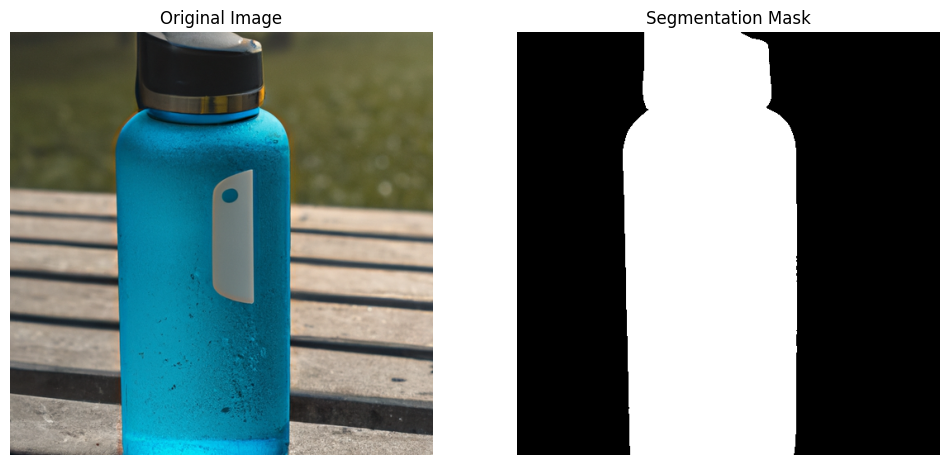

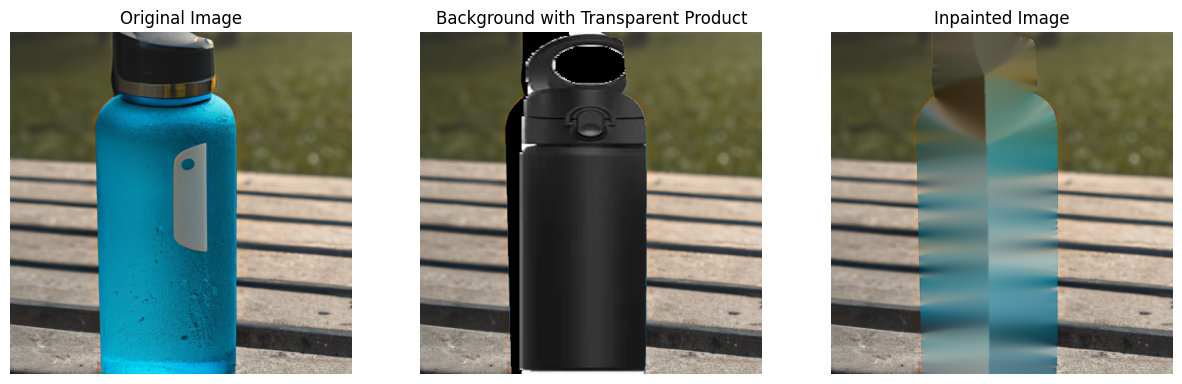

In [154]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry

# 初始化模型
sam = sam_model_registry[model_type](checkpoint=checkpoint)
mask_generator = SamAutomaticMaskGenerator(sam)

# 加载原始图像
image_path = "background.png"
image = Image.open(image_path)
image_np = np.array(image)

# 确保原始图像是三通道RGB
if image_np.ndim != 3 or image_np.shape[2] != 3:
    if image_np.shape[2] == 4:
        image_np = cv2.cvtColor(image_np, cv2.COLOR_RGBA2RGB)
    elif image_np.ndim == 2:
        image_np = cv2.cvtColor(image_np, cv2.COLOR_GRAY2RGB)

# 生成掩码
masks = mask_generator.generate(image_np)

# 显示原始图像和掩码
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(masks[0]["segmentation"], cmap='gray')
plt.title('Segmentation Mask')
plt.axis('off')
plt.show()

# 应用掩码并设置区域为黑色，即创建挖空的背景
masked_image = image_np.copy()
masked_image[masks[0]["segmentation"] == 1] = [0, 0, 0]

# 加载填充图像并调整大小与旋转
fill_image_path = "transparent_product.png"
fill_image = Image.open(fill_image_path)
fill_image_resized = fill_image.resize((image_np.shape[1], image_np.shape[0]))
fill_image_np = np.array(fill_image_resized)

# 确保填充图像是三通道RGB
if fill_image_np.ndim != 3 or fill_image_np.shape[2] != 3:
    if fill_image_np.shape[2] == 4:
        fill_image_np = cv2.cvtColor(fill_image_np, cv2.COLOR_RGBA2RGB)

# 将掩码转换为适合 OpenCV inpainting 的格式
mask_uint8 = (masks[0]["segmentation"].astype(np.uint8) * 255)  # 确保掩码是单通道255白色

# 将背景中对应掩码为1的区域用填充图像替换
background_with_inpaint = masked_image.copy()
background_with_inpaint[masks[0]["segmentation"] == 1] = fill_image_np[masks[0]["segmentation"] == 1]

# 使用 OpenCV 进行 inpainting 以平滑过渡区域
inpaint_result = cv2.inpaint(background_with_inpaint, mask_uint8, 3, cv2.INPAINT_TELEA)

# 显示结果
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(image_np)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(background_with_inpaint)
plt.title('Background with Transparent Product')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(inpaint_result)
plt.title('Inpainted Image')
plt.axis('off')
plt.show()